### 🎥 Cine-Match - Movie Recommendation System 📹

### File: Exploratory_Data_Analysis.ipynb - CineMatch

- Contributor: Sudesh Kumar Santhosh Kumar
- Email: santhosh@usc.edu
- GitHub: [Sudesh Kumar](https://github.com/SudeshKumarSanthosh)
- Date: 4th December, 2023
- Course: EE-541 Introduction to Deep Learning
- Team:
    * Sudesh Kumar Santhosh Kumar
    * Ori Shirin
### Description:

This Jupyter Notebook serves as the backbone of the CineMatch project's initial data exploration stage. Within these pages lies a comprehensive analysis of the MovieLens dataset, a treasure trove of movie-related information. The notebook meticulously dissects various facets of the dataset, including plots, genres, production details, financial metrics, and popularity scores.

`Key highlights of this exploratory analysis include:`

* Detailed statistical summaries and visualizations that uncover underlying patterns and trends in movie data.

* A thorough examination of the dataset's structure and content, laying the groundwork for the application of advanced deep learning and transformer technologies in CineMatch.

* Insightful correlations and comparisons between different cinematic attributes, offering a multifaceted understanding of what shapes movie popularity and viewer preferences.

* Innovative approaches to data cleaning and preprocessing, ensuring the integrity and usability of the dataset for further modeling.

This exploratory data analysis is not just a preliminary step but a crucial foundation for the sophisticated recommendation algorithms that will drive CineMatch. It aims to provide a clear, data-informed picture of the diverse landscape of cinema, setting the stage for a personalized and enriched movie selection experience.#

## Part 1 - Installation and Dataset Loading
-----

### S1. Setting up the notebook

### 1.1. Importing all necessary packages

In [1]:
import string
import warnings     
import re
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from typing import Dict, Text
from ast import literal_eval
from datetime import datetime
from wordcloud import WordCloud


### 1.1.1 Definition of Directories and Helper Functions

In [2]:
# Data Directory
data_dir = "../Input/Data/"
cleansed_data_dir = "../Input/CleansedData/"

In [3]:
def analyze_dataframe(df):
    # Identifying categorical and numerical features
    categorical_features = [col for col in df.columns if df[col].dtype == "object"]
    numerical_features = [col for col in df.columns if df[col].dtype == "float64"]

    # Printing general information about the DataFrame
    print(f"Shape of the Data: {df.shape}")
    print(f"Total number of Data-Points in the Data, N: {df.shape[0]}")
    print(f"Total number of dimensions in the Data, D: {df.shape[1]}")
    print()
    
    # Printing details about features
    print(f"Categorical Features: {categorical_features}")
    print(f"Numerical Features: {numerical_features}")
    print(f"Total number of Categorical Features: {len(categorical_features)}")
    print(f"Total number of Numerical Features: {len(numerical_features)}")
    
    
def get_text(text, obj='name'):
    """
    Extracts and concatenates values from a string representation of a list of dictionaries.

    This function is useful for processing stringified data structures, particularly when 
    working with datasets that store complex, structured data in string formats. It evaluates 
    the string as a Python expression to convert it into a list of dictionaries and then 
    extracts specified values.

    Parameters:
    - text (str): A string representation of a list of dictionaries.
    - obj (str, optional): The key for which the value is to be extracted from each dictionary.
                           Defaults to 'name'.

    Returns:
    - str: A single string if there's only one dictionary in the list, or a comma-separated 
           string concatenating the values extracted from each dictionary if there are multiple.

    Example:
    >>> get_text("[{'name': 'Drama'}, {'name': 'Comedy'}]")
    'Drama, Comedy'
    """
    from ast import literal_eval

    text = literal_eval(text)
    
    if len(text) == 1:
        for i in text:
            return i[obj]
    else:
        s = []
        for i in text:
            s.append(i[obj])
        return ', '.join(s)
    
    
def save_dataframe(df, directory, filename="preprocessed_data.csv"):
    """
    Saves the given DataFrame to a CSV file in the specified directory.

    Parameters:
    - df (pandas.DataFrame): The DataFrame to be saved.
    - directory (str): Path of the directory where the CSV file will be saved.
    - filename (str, optional): Name of the CSV file. Defaults to 'preprocessed_data.csv'.

    The function will create the directory if it does not exist. The DataFrame is saved
    without the index.
    """
    # Constructing the full file path
    file_path = os.path.join(directory, filename)

    # Creating the directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Saving the DataFrame as a CSV file
    df.to_csv(file_path, index=False)
    print(f"DataFrame saved successfully to {file_path}")



### 1.2. Loading all the Datasets into the notebook

In [4]:
warnings.filterwarnings('ignore')

credits = pd.read_csv(os.path.join(data_dir, 'credits.csv'))
keywords = pd.read_csv(os.path.join(data_dir, 'keywords.csv'))
movies = pd.read_csv(os.path.join(data_dir, 'movies_metadata.csv'))

pd.options.display.max_columns = 30
pd.set_option('display.float_format', '{:,}'.format) #to display float with commas

## Part 2 - Analysis of the Movies Metadata Dataset
------

### 2.1 Quick Look into the Dataset

In [5]:
movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,"373,554,033.0",81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,"5,415.0"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,"262,797,249.0",104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,"2,413.0"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

### 2.1.1 Initial Observations from the data.

In [7]:
analyze_dataframe(movies)

Shape of the Data: (45466, 24)
Total number of Data-Points in the Data, N: 45466
Total number of dimensions in the Data, D: 24

Categorical Features: ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'video']
Numerical Features: ['revenue', 'runtime', 'vote_average', 'vote_count']
Total number of Categorical Features: 20
Total number of Numerical Features: 4


### 2.2 Dropping Irrelevant Columns.


In the preprocessing phase of our analysis, we have chosen to remove specific columns from the `movies` DataFrame. The columns dropped are: `'belongs_to_collection'`, `'homepage'`, `'imdb_id'`, `'poster_path'`, `'status'`, `'title'`, and `'video'`. The decision to exclude these columns is based on the following considerations:

- **Belongs to Collection**: Information about whether a movie is part of a collection may not significantly impact our movie recommendation algorithms. Our focus is more on individual movie characteristics rather than their association with collections.

- **Homepage**: The URL of a movie’s homepage is typically not a determinant of its quality, popularity, or relevance to a viewer's preferences. Thus, this information is not critical for our analysis.

- **IMDb ID**: While useful for uniquely identifying movies, the IMDb ID is a technical attribute that does not contribute to the predictive or analytical aspects of our model.

- **Poster Path**: The path to the movie’s poster image is primarily a visual element and doesn’t provide quantifiable data for our analysis.

- **Status**: The status (e.g., Released, Post Production) is not a key factor in recommendation, as we are primarily interested in already available movies.

- **Title**: The movie title, while important for identification, is not used as a feature in our recommendation model. We focus on deeper, content-based features rather than titles which are arbitrary and don't hold analytical value.

- **Video**: Information about whether the entry is a video does not contribute to understanding the movie’s content or its appeal to the audience, which are more crucial for recommendation.

In [8]:
movies.drop(['belongs_to_collection', 'homepage', 'imdb_id', 
             'poster_path', 'status', 'title', 'video'], 
            axis='columns', inplace=True)

# Removing corrupted Data from the Dataset
movies.drop(movies.index[[19730, 29503, 35587]], inplace=True)
movies = movies.reset_index(drop=True)

In [9]:
movies.head(3)

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,"373,554,033.0",81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,7.7,"5,415.0"
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,"262,797,249.0",104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,"2,413.0"
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,6.5,92.0


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45463 non-null  object 
 1   budget                45463 non-null  object 
 2   genres                45463 non-null  object 
 3   id                    45463 non-null  object 
 4   original_language     45452 non-null  object 
 5   original_title        45463 non-null  object 
 6   overview              44509 non-null  object 
 7   popularity            45460 non-null  object 
 8   production_companies  45460 non-null  object 
 9   production_countries  45460 non-null  object 
 10  release_date          45376 non-null  object 
 11  revenue               45460 non-null  float64
 12  runtime               45203 non-null  float64
 13  spoken_languages      45460 non-null  object 
 14  tagline               20412 non-null  object 
 15  vote_average       

In [11]:
categoricalFeatures = [col for col in movies.columns if movies[col].dtype == "object"]
numericalFeatures = [col for col in movies.columns if movies[col].dtype == "float64"]


print(f"Shape of the Train Data: {movies.shape}")
print(f"Total number of Data-Points in the Movies Data, N: {movies.shape[0]}")
print(f"Total number of dimesions in the Movies Data, D: {movies.shape[1]}")

print()

print(f"Categorical Features: {categoricalFeatures}")
print(f"Numerical Features: {numericalFeatures}")
print(f"Total number of Categorical Features: {len(categoricalFeatures)}")
print(f"Total number of Numerical Features: {len(numericalFeatures)}")

Shape of the Train Data: (45463, 17)
Total number of Data-Points in the Movies Data, N: 45463
Total number of dimesions in the Movies Data, D: 17

Categorical Features: ['adult', 'budget', 'genres', 'id', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'tagline']
Numerical Features: ['revenue', 'runtime', 'vote_average', 'vote_count']
Total number of Categorical Features: 13
Total number of Numerical Features: 4


### 2.2.1 Checking for Missing Values before merging with Credits.csv 

In [12]:
for column in movies.columns:
    missing_values = movies[column].isna().sum() or movies[column].isnull().sum()
    print(f"Missing values in {column}: {missing_values}")

Missing values in adult: 0
Missing values in budget: 0
Missing values in genres: 0
Missing values in id: 0
Missing values in original_language: 11
Missing values in original_title: 0
Missing values in overview: 954
Missing values in popularity: 3
Missing values in production_companies: 3
Missing values in production_countries: 3
Missing values in release_date: 87
Missing values in revenue: 3
Missing values in runtime: 260
Missing values in spoken_languages: 3
Missing values in tagline: 25051
Missing values in vote_average: 3
Missing values in vote_count: 3


### 2.4 Merging Credits Dataset and Movies Dataset

In [13]:
movies['id'] = movies['id'].astype('int64')

df = movies.merge(keywords, on='id').merge(credits, on='id')
analyze_dataframe(df)

Shape of the Data: (46628, 20)
Total number of Data-Points in the Data, N: 46628
Total number of dimensions in the Data, D: 20

Categorical Features: ['adult', 'budget', 'genres', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'tagline', 'keywords', 'cast', 'crew']
Numerical Features: ['revenue', 'runtime', 'vote_average', 'vote_count']
Total number of Categorical Features: 15
Total number of Numerical Features: 4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46628 entries, 0 to 46627
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 46628 non-null  object 
 1   budget                46628 non-null  object 
 2   genres                46628 non-null  object 
 3   id                    46628 non-null  int64  
 4   original_language     46617 non-null  object 
 5   original_title        46628 non-null  object 
 6   overview              45633 non-null  object 
 7   popularity            46624 non-null  object 
 8   production_companies  46624 non-null  object 
 9   production_countries  46624 non-null  object 
 10  release_date          46540 non-null  object 
 11  revenue               46624 non-null  float64
 12  runtime               46360 non-null  float64
 13  spoken_languages      46624 non-null  object 
 14  tagline               20783 non-null  object 
 15  vote_average       

### 2.4.1 Checking for Missing Values after merging with Credits.csv 

In [15]:
for column in df.columns:
    missing_values = df[column].isna().sum() or df[column].isnull().sum()
    print(f"Missing values in {column}: {missing_values}")

Missing values in adult: 0
Missing values in budget: 0
Missing values in genres: 0
Missing values in id: 0
Missing values in original_language: 11
Missing values in original_title: 0
Missing values in overview: 995
Missing values in popularity: 4
Missing values in production_companies: 4
Missing values in production_countries: 4
Missing values in release_date: 88
Missing values in revenue: 4
Missing values in runtime: 268
Missing values in spoken_languages: 4
Missing values in tagline: 25845
Missing values in vote_average: 4
Missing values in vote_count: 4
Missing values in keywords: 0
Missing values in cast: 0
Missing values in crew: 0


* We can see that almost half of the data in`Tagline` is missing. I guess we can drop the Tagline column from our dataset.

* If we take a look at the distribution of the other missing values, they are very little close to range of 4 - 80's for a couple of fields and in the range of 900's for Overview. So dropping them won't affect our dataset.


### 2.5. Data Cleaning and Preprocessing

In [16]:
# Dropping the 'tagline' column
df.drop('tagline', axis=1, inplace=True)

# Dropping all na values in other fields.
df.dropna(subset=['popularity', 'production_companies', 'production_countries', 
                  'revenue', 'release_date', 'spoken_languages', 'vote_average', 'vote_count', 'overview', 'original_language'], inplace=True)

df['runtime'].fillna(df['runtime'].median(), inplace=True)


### 2.5.1 Checking for Missing Values after cleaning them out.

In [17]:
for column in df.columns:
    missing_values = df[column].isna().sum() or df[column].isnull().sum()
    print(f"Missing values in {column}: {missing_values}")

Missing values in adult: 0
Missing values in budget: 0
Missing values in genres: 0
Missing values in id: 0
Missing values in original_language: 0
Missing values in original_title: 0
Missing values in overview: 0
Missing values in popularity: 0
Missing values in production_companies: 0
Missing values in production_countries: 0
Missing values in release_date: 0
Missing values in revenue: 0
Missing values in runtime: 0
Missing values in spoken_languages: 0
Missing values in vote_average: 0
Missing values in vote_count: 0
Missing values in keywords: 0
Missing values in cast: 0
Missing values in crew: 0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45548 entries, 0 to 46627
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45548 non-null  object 
 1   budget                45548 non-null  object 
 2   genres                45548 non-null  object 
 3   id                    45548 non-null  int64  
 4   original_language     45548 non-null  object 
 5   original_title        45548 non-null  object 
 6   overview              45548 non-null  object 
 7   popularity            45548 non-null  object 
 8   production_companies  45548 non-null  object 
 9   production_countries  45548 non-null  object 
 10  release_date          45548 non-null  object 
 11  revenue               45548 non-null  float64
 12  runtime               45548 non-null  float64
 13  spoken_languages      45548 non-null  object 
 14  vote_average          45548 non-null  float64
 15  vote_count            45

In [19]:
analyze_dataframe(df)

Shape of the Data: (45548, 19)
Total number of Data-Points in the Data, N: 45548
Total number of dimensions in the Data, D: 19

Categorical Features: ['adult', 'budget', 'genres', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'keywords', 'cast', 'crew']
Numerical Features: ['revenue', 'runtime', 'vote_average', 'vote_count']
Total number of Categorical Features: 14
Total number of Numerical Features: 4


### 2.5.1 Formating the JSON data to String values
The columns - genres, production_companies, production_countries and spoken_languages looks like json objects converted to string. The following code cells extracts relevant substring with regular expression.

In [20]:
### Cleaning the Columns
df['genres'] = df['genres'].apply(get_text)
df['production_companies'] = df['production_companies'].apply(get_text)
df['production_countries'] = df['production_countries'].apply(get_text)
df['crew'] = df['crew'].apply(get_text)
df['spoken_languages'] = df['spoken_languages'].apply(get_text)
df['keywords'] = df['keywords'].apply(get_text)

### 2.5.2 Creation of new Columns from Cast

In [21]:
df['characters'] = df['cast'].apply(get_text, obj='character')
df['actors'] = df['cast'].apply(get_text)

df.drop('cast', axis=1, inplace=True)

### 2.5.3 Remove Duplicates from the DataFrame and reset index

In [22]:
df = df[~df['original_title'].duplicated()]
df = df.reset_index(drop=True)

### 2.5.4 Change of Data Type

In [23]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['budget'] = df['budget'].astype('float64')
df['popularity'] = df['popularity'].astype('float64')

### 2.5.5 Handling Missing values (empty strings other than na and null)

In [24]:
df['genres'] = df['genres'].apply(lambda x: "unknown" if len(x) == 0 else x)
df['keywords'] = df['keywords'].apply(lambda x: "unknown" if len(x) == 0 else x)
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: "unknown" if len(x) == 0 else x)
df['production_companies'] = df['production_companies'].apply(lambda x: "unknown" if len(x) == 0 else x)
df['production_countries'] = df['production_countries'].apply(lambda x: "unknown" if len(x) == 0 else x)
df['crew'] = df['crew'].apply(lambda x: "unknown" if len(x) == 0 else x)
df['actors'] = df['actors'].apply(lambda x: "unknown" if len(x) == 0 else x)
df['characters'] = df['characters'].apply(lambda x: "unknown" if len(x) == 0 else x)


### 2.5.5 Final Overview of the Transformed & Cleansed Dataset

In [25]:
df.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,keywords,crew,characters,actors
0,False,"30,000,000.0","Animation, Comedy, Family",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,"373,554,033.0",81.0,English,7.7,"5,415.0","jealousy, toy, boy, friendship, friends, rival...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","Woody (voice), Buzz Lightyear (voice), Mr. Pot...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,False,"65,000,000.0","Adventure, Fantasy, Family",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,"262,797,249.0",104.0,"English, Français",6.9,"2,413.0","board game, disappearance, based on children's...","Larry J. Franco, Jonathan Hensleigh, James Hor...","Alan Parrish, Samuel Alan Parrish / Van Pelt, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,False,0.0,"Romance, Comedy",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"Warner Bros., Lancaster Gate",United States of America,1995-12-22,0.0,101.0,English,6.5,92.0,"fishing, best friend, duringcreditsstinger, ol...","Howard Deutch, Mark Steven Johnson, Mark Steve...","Max Goldman, John Gustafson, Ariel Gustafson, ...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,False,"16,000,000.0","Comedy, Drama, Romance",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,"81,452,156.0",127.0,English,6.1,34.0,"based on novel, interracial relationship, sing...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","Savannah 'Vannah' Jackson, Bernadine 'Bernie' ...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,False,0.0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,1995-02-10,"76,578,911.0",106.0,English,5.7,173.0,"baby, midlife crisis, confidence, aging, daugh...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","George Banks, Nina Banks, Franck Eggelhoffer, ...","Steve Martin, Diane Keaton, Martin Short, Kimb..."


In [26]:
analyze_dataframe(df)

Shape of the Data: (42363, 20)
Total number of Data-Points in the Data, N: 42363
Total number of dimensions in the Data, D: 20

Categorical Features: ['adult', 'genres', 'original_language', 'original_title', 'overview', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'crew', 'characters', 'actors']
Numerical Features: ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
Total number of Categorical Features: 12
Total number of Numerical Features: 6


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42363 entries, 0 to 42362
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 42363 non-null  object        
 1   budget                42363 non-null  float64       
 2   genres                42363 non-null  object        
 3   id                    42363 non-null  int64         
 4   original_language     42363 non-null  object        
 5   original_title        42363 non-null  object        
 6   overview              42363 non-null  object        
 7   popularity            42363 non-null  float64       
 8   production_companies  42363 non-null  object        
 9   production_countries  42363 non-null  object        
 10  release_date          42363 non-null  datetime64[ns]
 11  revenue               42363 non-null  float64       
 12  runtime               42363 non-null  float64       
 13  spoken_languages

We have successfully cleaned the Dataset and combined credits and movie meta data into a single Dataframe

### 2.6 Saving the Preprocessed and Cleansed Dataframe

In [28]:
save_dataframe(df, cleansed_data_dir, 'Movies.csv')

DataFrame saved successfully to ../Input/CleansedData/Movies.csv


## Part 3 - Visualization and Data Analysis of the Preprocessed Data
----

### 3.1 Plotting the distribution of unknown values in every feature in our dataset.

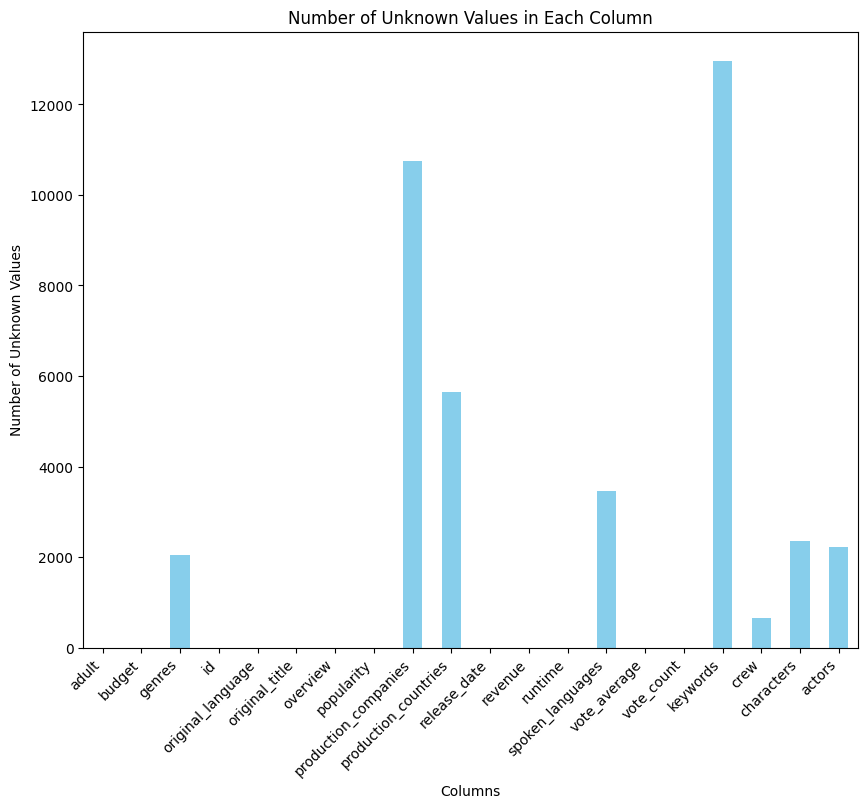

In [29]:
# Assuming 'df' is the actual DataFrame from which you want to plot the 'unknown' values
# First, we'll get the column names as a list
column_names = df.columns.tolist()

# Now let's count the 'unknown' values for each column
unknown_counts = {column: df[column].apply(lambda x: x == 'unknown').sum() for column in column_names}

# Convert the dictionary to a Series for easier plotting
unknown_counts_series = pd.Series(unknown_counts)

# Plotting
plt.figure(figsize=(10, 8))
unknown_counts_series.plot(kind='bar', color='skyblue')
plt.title('Number of Unknown Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unknown Values')
plt.xticks(rotation=45, ha='right')
plt.show()


### 3.1 Distribution of Adult Movies

(0.0, 2.0, 0.9, 1.2)

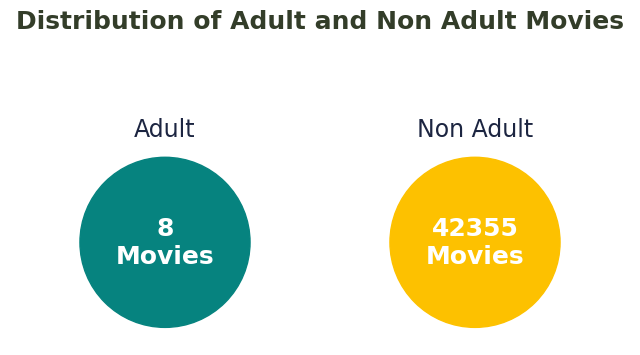

In [30]:
plt.figure(figsize=(8,4))
plt.scatter(x=[0.5, 1.5], y=[1,1], s=15000, color=['#06837f', '#fdc100'])
plt.xlim(0,2)
plt.ylim(0.9,1.2)

plt.title('Distribution of Adult and Non Adult Movies', fontsize=18, weight=600, color='#333d29')
plt.text(0.5, 1, '{}\nMovies'.format(str(len(df[df['adult']=='True']))), va='center', ha='center', fontsize=18, weight=600, color='white')
plt.text(1.5, 1, '{}\nMovies'.format(str(len(df[df['adult']=='False']))), va='center', ha='center', fontsize=18, weight=600, color='white')
plt.text(0.5, 1.11, 'Adult', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')
plt.text(1.5, 1.11, 'Non Adult', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')

plt.axis('off')

We can see that there is a huge difference between those 2 types of movies in terms of presence for this particular dataset

### 3.2 Budget and Revenue Influence on Popularity of Movies

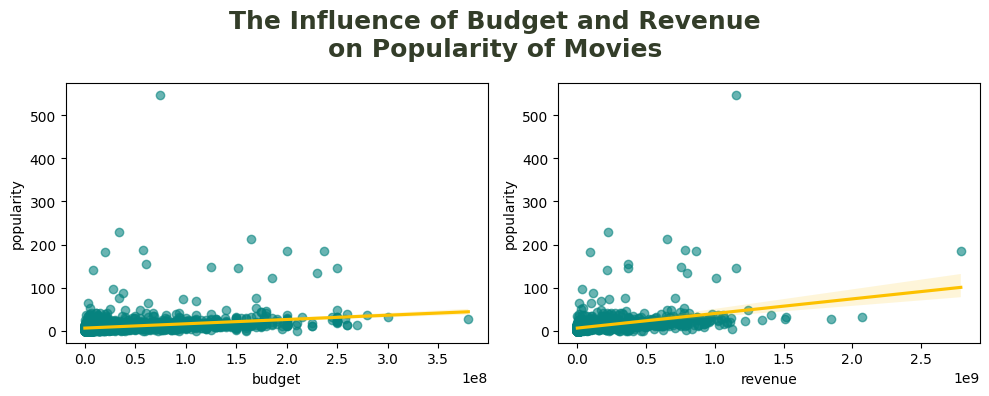

In [31]:
df_plot = df[(df['budget'] != 0) & (df['revenue'] != 0)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('The Influence of Budget and Revenue\non Popularity of Movies', fontsize=18, weight=600, color='#333d29')
for i, col in enumerate(['budget', 'revenue']):
    sns.regplot(data=df_plot, x=col, y='popularity',
                scatter_kws={"color": "#06837f", "alpha": 0.6}, line_kws={"color": "#fdc100"}, ax=axes[i])

plt.tight_layout()

* Both financial metrics, budget and revenue, seem to have a positive correlation with the popularity of movies.

* The correlation between revenue and popularity appears stronger than the correlation between budget and popularity.

* There is significant variability in popularity that is not explained by budget or revenue alone, indicating other factors may also play a significant role in determining a movie's popularity.

### 3.3 Word Cloud for the most common words in the Overview

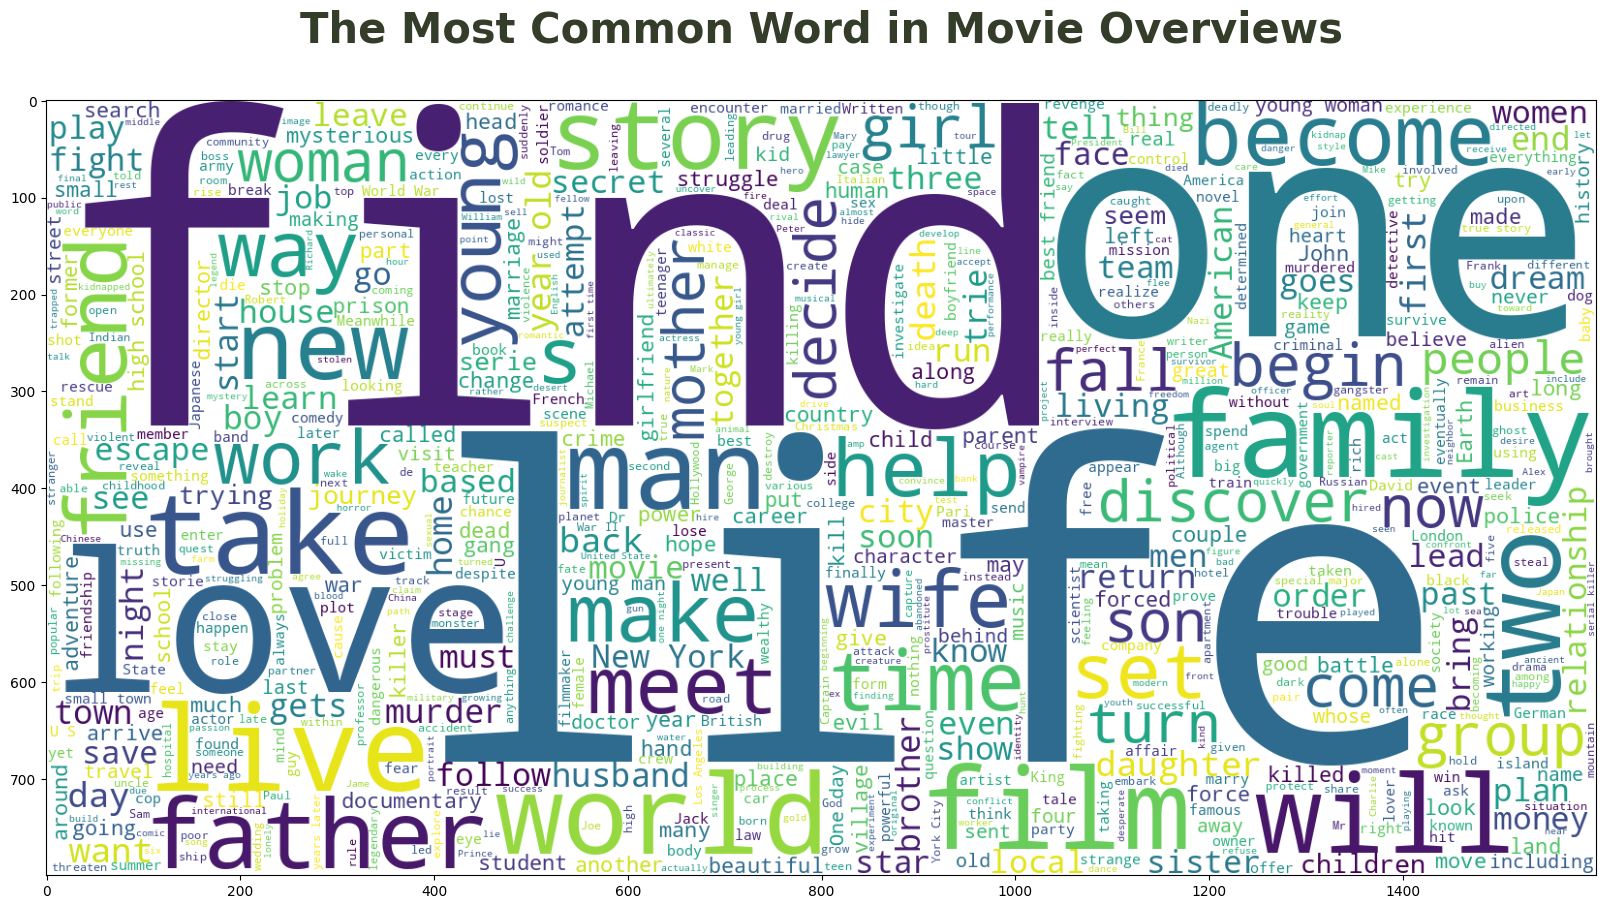

In [32]:
plt.figure(figsize=(20,20))
plt.title('The Most Common Word in Movie Overviews\n', fontsize=30, weight=600, color='#333d29')
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(df['overview']))

plt.imshow(wc)

Word "life", "one", "find", "love", "world", "Family" apparently appear in many occasions

### 3.4 Visualization of Top Genres and Distribution of Movies

(-1.25, 1.25, -1.25, 1.25)

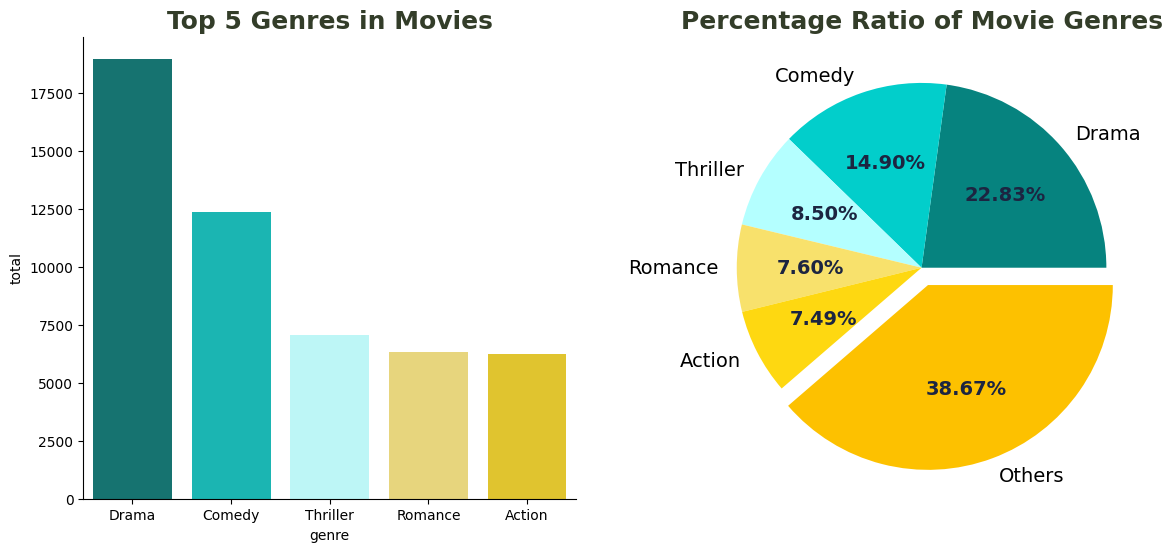

In [33]:
genres_list = []
for i in df['genres']:
    genres_list.extend(i.split(', '))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()

df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'genre': 'Others', 'total':df_plot_full[6:].sum()[0]}
plt.title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1], colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')

- `Drama` is the most dominant genre with over 18000 movies
- Apart from `Drama`, `Comedy`, `Thriller`, `Romance` and `Action`, there are still many genres in the dataset. They hold `38.67%` of total genres in the movies


### 3.5 Movies released by Date

Text(0.5, 1.0, 'Total Released Movie by Date')

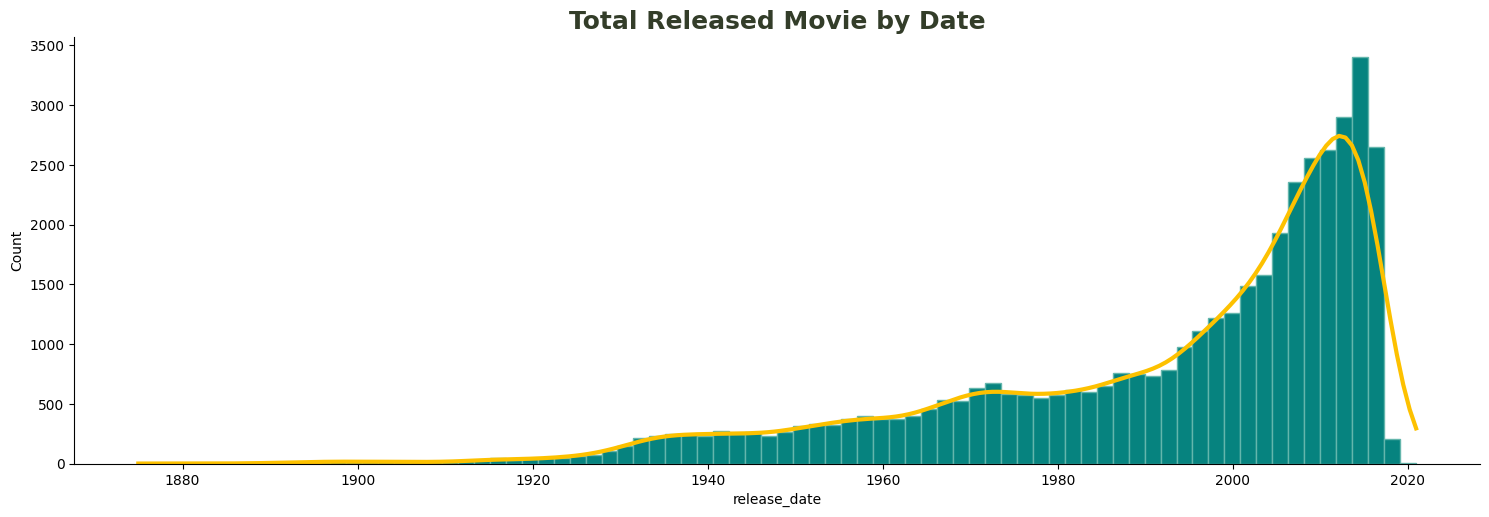

In [34]:
sns.displot(data=df, x='release_date', kind='hist', kde=True,
            color='#fdc100', facecolor='#06837f', edgecolor='#64b6ac', line_kws={'lw': 3}, aspect=3)
plt.title('Total Released Movie by Date', fontsize=18, weight=600, color='#333d29')

* Since its inception in 1930, the film industry has seen substantial growth over the past five decades. 

* However, there is a noticeable decline in the total number of films released around 2020, which can be attributed to the dataset's limited entries for those years. or may be due to covid-19 pandemic.

### 3.6 Top 5 

In [35]:
original_language_list = []
for i in df['original_language']:
    original_language_list.extend(i.split(', '))
    
spoken_languages_list = []
for i in df['spoken_languages']:
    if i != '':
        spoken_languages_list.extend(i.split(', '))

actors_list = []
for i in df['actors']:
    if i != '':
        actors_list.extend(i.split(', '))
        
crew_list = []
for i in df['crew']:
    if i != '':
        crew_list.extend(i.split(', '))

company_list = []
for i in df['production_companies']:
    if i != '':
        company_list.extend(i.split(', '))
    
country_list = []
for i in df['production_countries']:
    if i != '':
        country_list.extend(i.split(', '))

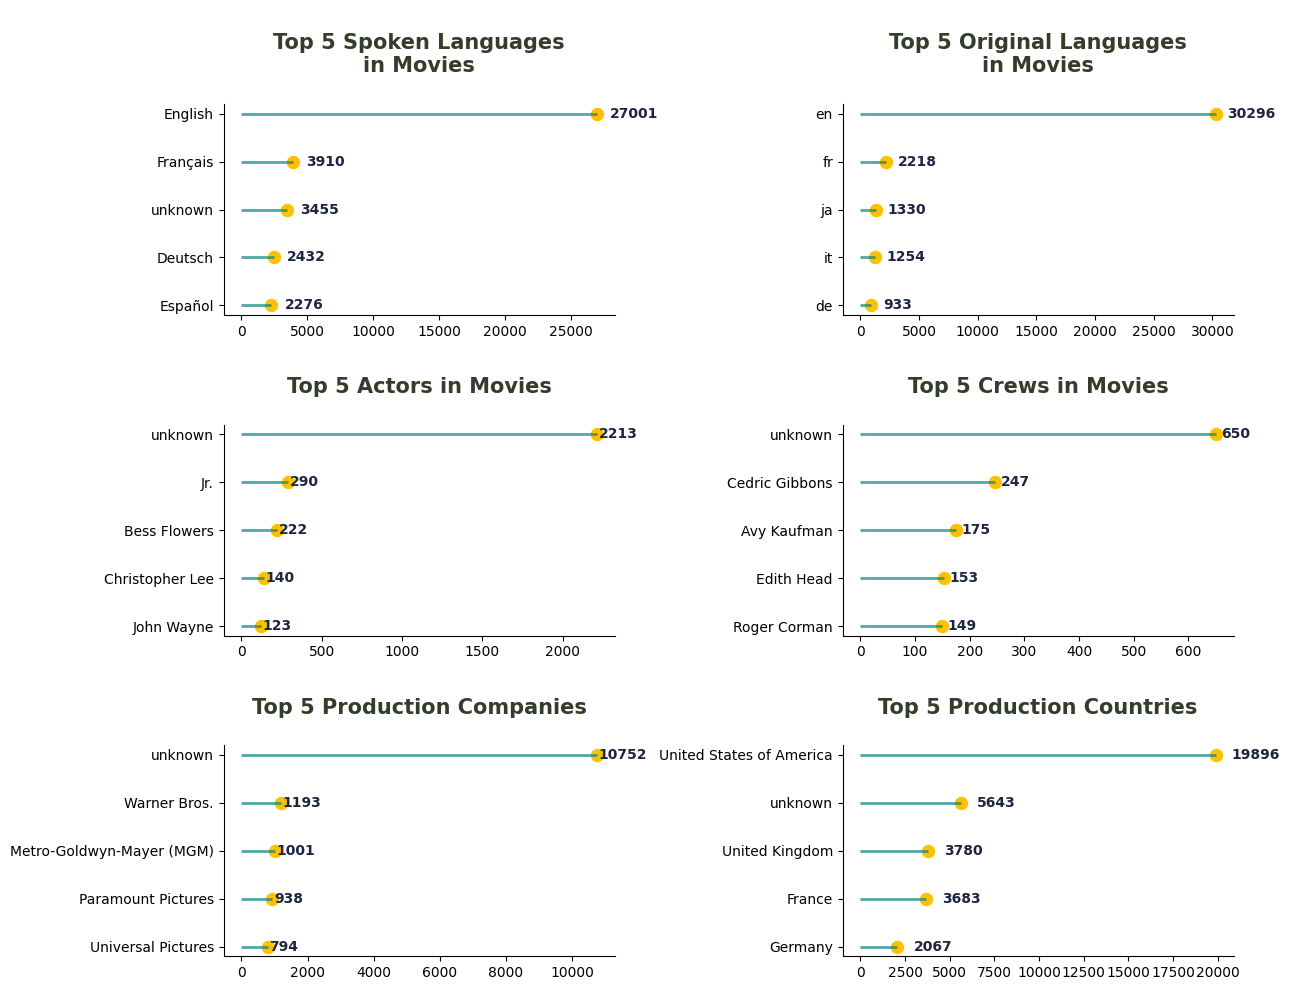

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 10))

# Spoken language plot
df_plot1 = pd.DataFrame(Counter(spoken_languages_list).most_common(5), columns=['language', 'total']).sort_values(by='total', ascending=True)
axes[0,0].hlines(y=df_plot1['language'], xmin=0, xmax=df_plot1['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[0,0].scatter(x=df_plot1['total'], y=df_plot1['language'], s = 75, color='#fdc100')
axes[0,0].set_title('\nTop 5 Spoken Languages\nin Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot1['total']):
    axes[0,0].text(value+1000, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

# Original Language plot
df_plot2 = pd.DataFrame(Counter(original_language_list).most_common(5), columns=['language', 'total']).sort_values(by='total', ascending=True)
axes[0,1].hlines(y=df_plot2['language'], xmin=0, xmax=df_plot2['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[0,1].scatter(x=df_plot2['total'], y=df_plot2['language'], s = 75, color='#fdc100')
axes[0,1].set_title('\nTop 5 Original Languages\nin Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot2['total']):
    axes[0,1].text(value+1000, i, value, va='center', fontsize=10, weight=600, color='#1c2541')
    
# Actor plot
df_plot3 = pd.DataFrame(Counter(actors_list).most_common(5), columns=['actor', 'total']).sort_values(by='total', ascending=True)
axes[1,0].hlines(y=df_plot3['actor'], xmin=0, xmax=df_plot3['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[1,0].scatter(x=df_plot3['total'], y=df_plot3['actor'], s = 75, color='#fdc100')
axes[1,0].set_title('\nTop 5 Actors in Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot3['total']):
    axes[1,0].text(value+10, i, value, va='center', fontsize=10, weight=600, color='#1c2541')
    
# Crew plot
df_plot4 = pd.DataFrame(Counter(crew_list).most_common(5), columns=['name', 'total']).sort_values(by='total', ascending=True)
axes[1,1].hlines(y=df_plot4['name'], xmin=0, xmax=df_plot4['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[1,1].scatter(x=df_plot4['total'], y=df_plot4['name'], s = 75, color='#fdc100')
axes[1,1].set_title('\nTop 5 Crews in Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot4['total']):
    axes[1,1].text(value+10, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

# Company plot
df_plot5 = pd.DataFrame(Counter(company_list).most_common(5), columns=['name', 'total']).sort_values(by='total', ascending=True)
axes[2,0].hlines(y=df_plot5['name'], xmin=0, xmax=df_plot5['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[2,0].scatter(x=df_plot5['total'], y=df_plot5['name'], s = 75, color='#fdc100')
axes[2,0].set_title('\nTop 5 Production Companies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot5['total']):
    axes[2,0].text(value+50, i, value, va='center', fontsize=10, weight=600, color='#1c2541')
    
# Country plot
df_plot6 = pd.DataFrame(Counter(country_list).most_common(5), columns=['name', 'total']).sort_values(by='total', ascending=True)
axes[2,1].hlines(y=df_plot6['name'], xmin=0, xmax=df_plot6['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[2,1].scatter(x=df_plot6['total'], y=df_plot6['name'], s = 75, color='#fdc100')
axes[2,1].set_title('\nTop 5 Production Countries\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot6['total']):
    axes[2,1].text(value+900, i, value, va='center', fontsize=10, weight=600, color='#1c2541')
    
sns.despine()
plt.tight_layout()

- Within this dataset, English predominates as both the original and the most frequently spoken language in the films. 

- The actor with the most appearances is Jr., while Cedric Gibbons stands out as the crew member involved in the highest number of movies. 

- Warner Bros. leads as the top production company, credited with 1194 films. 

- Given the prominence of acclaimed production companies originating from the United States, it's unsurprising that the USA ranks as the foremost country for movie production.

### 3.7 Top 5 Genres Vs. Other Important Fetures

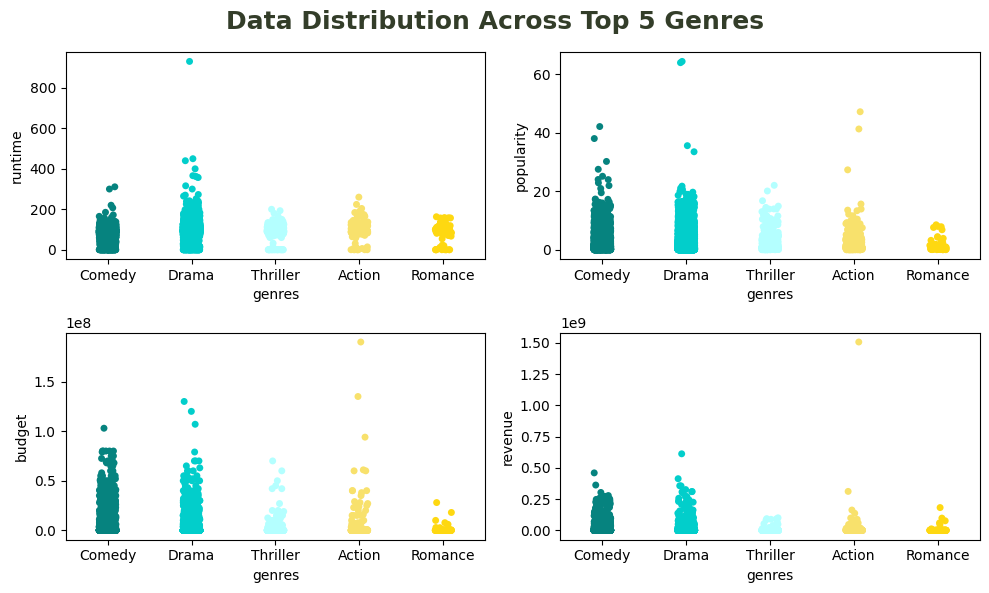

In [37]:
df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
df_plot = df[df['genres'].isin(df_plot['genre'].to_numpy())]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

plt.suptitle('Data Distribution Across Top 5 Genres', fontsize=18, weight=600, color='#333d29')
for i, y in enumerate(['runtime', 'popularity', 'budget', 'revenue']):
    sns.stripplot(data=df_plot, x='genres', y=y, ax=axes.flatten()[i], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])

plt.tight_layout()

- The movie genre that has the `longest runtime is drama`.
- The `least popular` genre in the top 5 is `romance`
- `Action` movies spent `more money` than the rest of the movies.
- One of the action movies got a vast profit compared to the others.

### 3.8 Relationship between Ratings and Popularity of Movies

Text(0.5, 1.0, 'The Relationship Between Rating and Popularity')

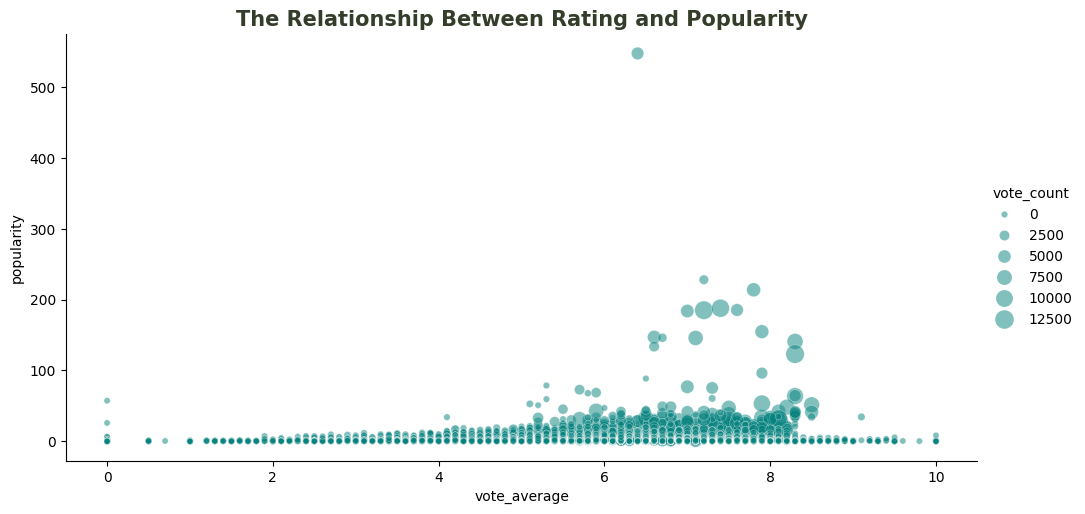

In [38]:
sns.relplot(data=df, x='vote_average', y='popularity', size='vote_count',
            sizes=(20, 200), alpha=.5, aspect=2, color='#06837f')
plt.title('The Relationship Between Rating and Popularity', fontsize=15, weight=600, color='#333d29')

- Movies which received 0 or 10 ratings are very small ratio of users.

- The ratings between 5 - 9 are given by more voters.

- Popular movies get more votes.

Our Exploratory Data Analysis is completed. In the next Notebook let's see how we can use these inferences to design the Recommendation System.